<a href="https://colab.research.google.com/github/anturex2016/MachineLearning-Data/blob/master/Housing_price_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/anturex2016/MachineLearning-Data


In [ ]:
import pandas as pd

housing = pd.read_csv('MachineLearning-Data/data.csv') 
#housing.head()

housing.info()
#housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d004e0860>,
      dtype=object)

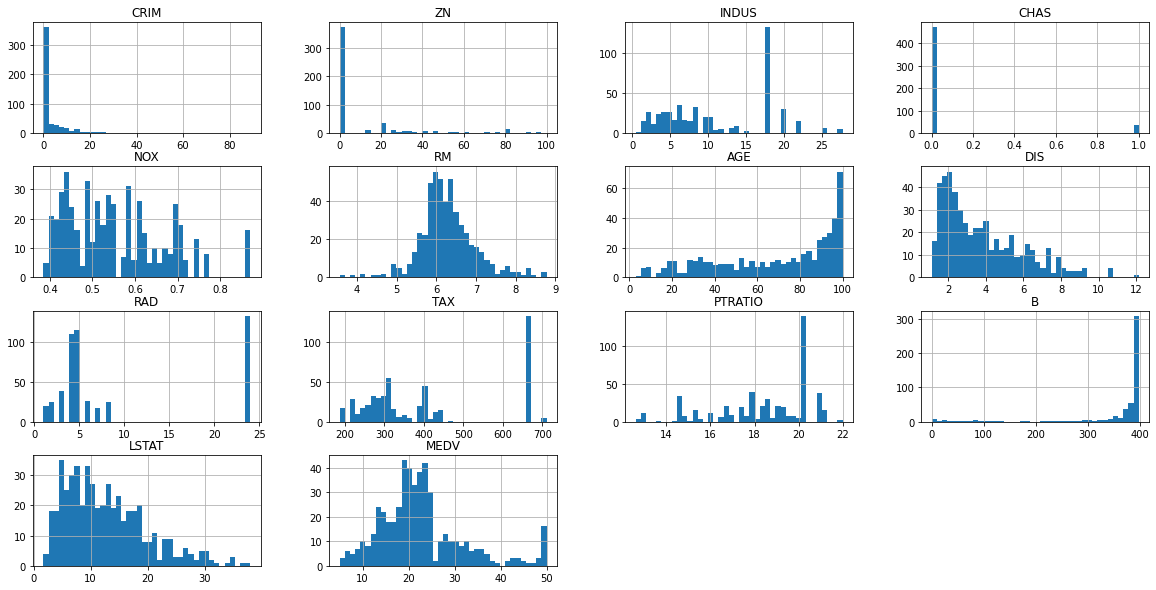

In [ ]:
%matplotlib inline
#for histogram
import matplotlib.pyplot as plt
housing.hist(bins=40, figsize=(20,10))


In [ ]:
#for learning purpose
#import numpy as np
#def split_train_set(data,test_ratio):
   # np.random.seed(42)
    #shuffled=np.random.permutation(len(data))
   # print(shuffled)
    #test_set_size = int(len(data) * test_ratio)
    #test_indices = shuffled[:test_set_size]
    #train_indices = shuffled[test_set_size:]
    #return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
#train_set, test_set = split_train_set(housing, 0.2)
#print(f"Rows in train set:{len(train_set)} \nRows in test set:{len(test_set)}")


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size = 0.2, random_state=42)
print(f"Rows in train set:{len(train_set)} \nRows in test set:{len(test_set)}")



Rows in train set:404 
Rows in test set:102


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]



In [ ]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [ ]:
housing=strat_train_set.copy()

#collrelation


In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d002241d0>,
      dtype=object)

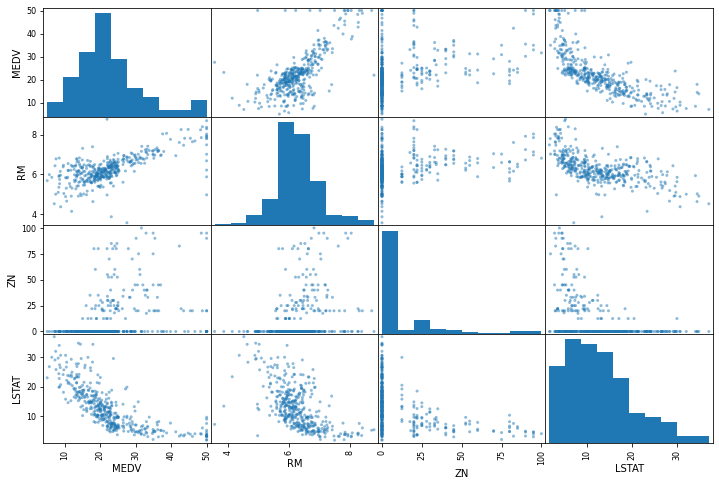

In [ ]:
from pandas.plotting import scatter_matrix
attribute = ["MEDV", "RM","ZN","LSTAT"]
scatter_matrix(housing[attribute], figsize=(12,8))

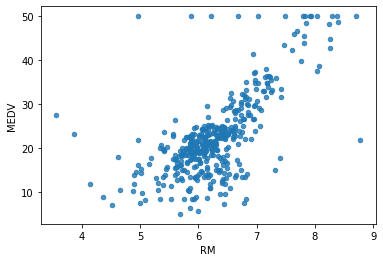

In [ ]:
housing.plot(kind="scatter",x="RM",y="MEDV", alpha=0.8)

#attribute combination


In [ ]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [ ]:
housing.describe() #before filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.480852
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.457774
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.801475
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.947454
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [ ]:
housing= strat_train_set.drop("MEDV", axis=1)
housing_label=strat_train_set['MEDV'].copy()

# IF any data is missing 
# using simpleImporter


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy= "median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
imputer.statistics_


array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [ ]:
X = imputer.transform(housing)

In [ ]:
housing_transform = pd.DataFrame(X,columns=housing.columns) # if any data is missing it will fill automatically

In [ ]:
housing_transform.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000




# Creating pipeline . It will help to change model easily 

---



---



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler

my_pipeline= Pipeline([
       ('imputer',SimpleImputer(strategy= "median")),
       ('stand_scaler', StandardScaler()),
])

In [ ]:
housing_num_trans = my_pipeline.fit_transform(housing)

In [ ]:
housing_num_trans  #numpy array is using cause next we will use predictor

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Using Models for 
1. linear Regression
2. Decision tree Rgression
3. Random forest
4. Support Vector Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#model = LinearRegression()
#model = DecisionTreeRegressor()
model= SVR()
model.fit(housing_num_trans, housing_label)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
some_data = housing.iloc[:5]
some_label = housing_label.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.99468988, 26.50534387, 16.95475623, 23.73343523, 23.85641138])

In [ ]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating model

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_trans)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [ ]:
lin_rmse

5.446324773757454

In [ ]:
lin_mse

29.662453541244183

# Using Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_num_trans, housing_label, scoring="neg_mean_squared_error", cv=10)
rmes_scores= np.sqrt(-score)

In [ ]:
rmes_scores

array([4.11289167, 5.2459413 , 4.33745767, 5.36473755, 6.94920337,
       3.54950949, 9.28926249, 6.46483852, 3.83413282, 6.91915401])

In [ ]:
def print_scores(score):
              print("Scores:", score)
              print("Mean:", score.mean())
              print("Standard deviation:", score.std())


In [ ]:
print_scores(rmes_scores)

Scores: [4.11289167 5.2459413  4.33745767 5.36473755 6.94920337 3.54950949
 9.28926249 6.46483852 3.83413282 6.91915401]
Mean: 5.606712889302848
Standard deviation: 1.7096104337069795


In [ ]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

4.450403256674115

In [ ]:
final_mse

19.80608914701557

In [ ]:
final_predictions

array([25.11138334, 12.90670106, 26.85007527, 24.44100839, 16.30566736,
       15.33933179, 17.3922779 , 15.01018503, 27.92154627, 29.35757629,
       19.63208856, 14.32027417, 20.76549793, 16.30036633, 20.15948498,
       12.39164274, 28.6174538 , 15.6330182 , 24.0470667 , 22.00720454,
       19.30642039, 16.5174759 , 21.00190704, 23.73971199, 19.19508392,
       28.74713802, 16.36006107, 31.16934132, 10.94598033, 28.93761948,
       22.50235635, 20.84486056, 25.96242893, 12.93194793, 22.59713616,
       14.93031076, 33.7310775 , 23.89206551, 23.02012892, 31.2154859 ,
       24.55370908, 31.68630894, 22.37141134, 22.40056992, 16.96104713,
       31.26325305, 35.80419403, 20.37342159, 19.16727588, 21.8716204 ,
       20.24037451, 14.74155648, 18.82387078, 20.88623054, 25.31410508,
       32.5951475 , 34.82810141, 28.36556619, 20.54635859, 19.73930265,
       33.23343334, 13.80408526, 18.734502  , 24.28482105, 15.3981729 ,
       32.52576082, 20.08396076, 18.11530051, 19.97848037, 29.92

In [ ]:
list(Y_test)

[16.5,
 10.2,
 30.1,
 23.0,
 14.4,
 15.6,
 19.4,
 14.1,
 30.3,
 35.2,
 23.1,
 13.8,
 25.0,
 27.9,
 19.5,
 12.3,
 32.2,
 13.5,
 23.8,
 21.7,
 19.2,
 19.5,
 10.4,
 23.2,
 18.6,
 28.5,
 15.2,
 32.0,
 7.2,
 34.6,
 20.1,
 20.6,
 23.6,
 13.1,
 23.8,
 12.7,
 43.1,
 24.7,
 22.2,
 44.0,
 28.1,
 31.0,
 21.7,
 23.4,
 19.5,
 33.1,
 41.7,
 18.7,
 19.9,
 20.6,
 21.2,
 13.6,
 20.3,
 17.8,
 27.1,
 31.5,
 50.0,
 29.1,
 18.9,
 20.4,
 50.0,
 7.2,
 17.2,
 36.2,
 14.6,
 33.2,
 23.8,
 19.9,
 21.5,
 37.3,
 27.0,
 22.0,
 24.3,
 19.8,
 33.3,
 7.0,
 19.4,
 20.9,
 21.1,
 20.4,
 22.2,
 11.9,
 11.7,
 21.6,
 19.7,
 23.0,
 16.7,
 21.7,
 20.6,
 23.3,
 19.6,
 28.0,
 5.0,
 24.4,
 20.8,
 24.8,
 21.8,
 23.6,
 19.0,
 25.0,
 20.3,
 21.5]